In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# import io
# %cd '/Users/rajeshprabhakar/Desktop/Hackathon/HR Analytics'

In [62]:
hrtrain=pd.read_csv('train_LZdllcl.csv')

In [63]:
hrtest=pd.read_csv('test_2umaH9m.csv')

In [64]:
hrtrain.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [65]:
hrtest.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [66]:
# Dependent Variable - is_promoted (0/1)(No/Yes)
hrtrain.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [67]:
# How many Male/Female Promoted?
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [68]:
# Hypothesis Testing
# Type 1 Error - Finding Criminal Not Guilty - Accepting a False
# Hypothesis. Patient has No Covid but RTPCR Test gave Positive
# Type 2 Error - Hanging an innocent Man - Rejecting a True 
# Hypothesis. Patient has Covid but RTPCR Test gave Negative

In [69]:
hrtrain.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [70]:
hrtrain.previous_year_rating=hrtrain.previous_year_rating.fillna(3.0)

In [71]:
hrtest.previous_year_rating.value_counts(dropna=False)

3.0    7921
5.0    5097
4.0    4249
1.0    2680
NaN    1812
2.0    1731
Name: previous_year_rating, dtype: int64

In [72]:
hrtest.previous_year_rating=hrtest.previous_year_rating.fillna(3.0)

In [73]:
hrtrain.education.value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [74]:
hrtrain.education=hrtrain.education.fillna("Bachelor's")

In [75]:
hrtest.education=hrtest.education.fillna("Bachelor's")

In [76]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [77]:
# Test Null Average avg_training_score of is_promoted(0/1) Equal
# groupby(), Null & Alt, Split Dataframe, Conduct test & Interpret
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [78]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).var()

is_promoted
0    168.791268
1    217.448116
Name: avg_training_score, dtype: float64

In [79]:
promotedyes=hrtrain[hrtrain.is_promoted==1]
promotedno=hrtrain[hrtrain.is_promoted==0]

In [80]:
# Null - No Significant difference in Average avg_training_score of
# is_promoted(0/1) equal.
# Alt - Significant difference in Average avg_training_score of
# is_promoted(0/1) equal.

In [81]:
from scipy.stats import ttest_ind

In [82]:
ttest_ind(promotedyes.avg_training_score,
          promotedno.avg_training_score,equal_var=False)
# Since pvalue=7.662329172468838e-291 is less than 0.05,Reject
# Null Hypothesis

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [83]:
# Test Null Average avg_training_score of Female & Male Equal
# groupby(), Null & Alt, Split Dataframe, Conduct test & Interpret
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [84]:
male=hrtrain[hrtrain.gender=='m']
female=hrtrain[hrtrain.gender=='f']

In [85]:
ttest_ind(male.avg_training_score,female.avg_training_score,
         equal_var=False)

Ttest_indResult(statistic=-6.122262326710493, pvalue=9.321257169457923e-10)

In [86]:
# ttest=t statistic=(Mean1-Mean2)/sqrt((var1/n1)+(var2/n2))

In [87]:
# Test Null avg_training_score of different education levels equal
# groupby(), Null & Alt, Split Dataframe, Conduct test & Interpret

In [88]:
hrtrain.avg_training_score.groupby(hrtrain.education).mean()

education
Bachelor's          63.097446
Below Secondary     64.925466
Master's & above    64.061240
Name: avg_training_score, dtype: float64

In [89]:
ug=hrtrain[hrtrain.education=="Bachelor's"]
pg=hrtrain[hrtrain.education=="Master's & above"]
bs=hrtrain[hrtrain.education=="Below Secondary"]

In [90]:
from scipy.stats import f_oneway

In [91]:
f_oneway(ug.avg_training_score,pg.avg_training_score,
        bs.avg_training_score)

F_onewayResult(statistic=33.5035375621275, pvalue=2.873996658407989e-15)

In [92]:
# Test Null No Association between gender & is_promoted?
# Both Categorical Variables
# Cross tabulation is input

In [93]:
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [94]:
from scipy.stats import chi2_contingency

In [95]:
chi2_contingency(pd.crosstab(hrtrain.is_promoted,
                            hrtrain.gender))
# Since p-value=0.00976509 is less than 0.05, Reject null

(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428, 35217.29382572],
        [ 1389.29382572,  3278.70617428]]))

In [96]:
# MACHINE LEARNING - SUPERVISED LEARNING - CLASSIFICATION MODELS
# IF DEPENDENT VARIABLE(y) IS NON NUMERIC AND CATEGORICAL AND
# BINARY(YES/NO), THEN BINARY LOGISTIC REGRESSION IS USED.
# IF THERE ARE MORE THAN 2 LEVELS THEN MULTINOMIAL LOGISTIC
# REGRESSION IS USED.
# BINARY LOGISTIC REGRESSION -
#        EXP^(B0+B1X1+B2X2+B3X3+B4X4+..BnXn)
# P = ------------------------------------------------
#       1 + EXP^(B0+B1X1+B2X2+B3X3+B4X4+..BnXn)
# p - Probability lies between 0 & 1
# EXP - Exponential - 2.718
# B0 - Intercept or Constant
# B1,B2,B3,B4,..Bn - Coefficients
# X1,X2,X3,X4,...Xn - Independent variables
# Equation predicts predicted probability
# Classification Rule for all Classification Models
# probability greater than equal to 0.50 ---- 1 (yes)
# probability less than 0.50 ------ 0  (no)

# Assumptions
# Dependent Variable(y) must be Binary.(yes/no)
# Independent Variables can be both numerical and categorical.
# No Multicollinearity(strong correlation >0.95)
# Exogeneity 
# Sample Size is minimum 50 observations per variable

# Interpreatation of Output
# Accuracy calculated from Confusion Matrix
# intercept + Coefficients

# Confusion Matrix is a 2 X 2 matrix of Actual Class & Predicted
# class. Cross Tabulation of y and predicted y
# Actual Class is positive & Predicted class is Positive  -
# True Positive (TP)
# Actual Class is Positive but Predicted class is Negative -
# False Negative (Type II Error) (FN)
# Actual Class is Negative but Predicted class is Positive -
# False Positive (Type I Error) (FP)
# Actual Class is Negative & Predicted Class is Negative-
# True Negative (TN)

# Primary metric for all Classification Models is
#                      True positive + True negative
# Accuracy = ----------------------------------------------------
#            True positive+FalseNegative+FalsePositive+TrueNegative
# Accuracy must be between 0.70 - 0.90 

#                               True Positive
# Sensitivity or Recall = ------------------------------
#                          True Positive + False Negative
# Sensitivity must be higher closer to 1
# Sensitivity is also called as True Positive Rate (TPR)

#                 True Negative
# Specificty = ------------------------------
#                True Negative + False Positive
# Specificity is als called as True Negative Rate
# Specificity must be higher closer to 1.

#                  True positive
# Precision = -----------------------------
#                True Positive + False Positive
# Precision must be higher closer to 1

#                Precision X Recall
# F1 Score = 2 X -------------------
#                Precision + Recall


In [97]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [98]:
objectcolumns=hrtrain[['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating',
                      'KPIs_met >80%', 'awards_won?','is_promoted']]

In [99]:
numericcolumns=hrtrain[['no_of_trainings', 'age',
                        'avg_training_score']]

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le=LabelEncoder()

In [102]:
objectcolumnsdummy=objectcolumns.apply(le.fit_transform)

In [103]:
hrtraindf=pd.concat([numericcolumns,objectcolumnsdummy],axis=1)

In [104]:
y=hrtraindf.is_promoted
X=hrtraindf.drop('is_promoted',axis=1)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logreg=LogisticRegression(max_iter=2000)
# Convergence Warning means Not All Coefficients are Calculated, thwn we increase iteration in inside paranthesis or function

In [107]:
logregmodel=logreg.fit(X,y)

In [108]:
logregmodel.score(X,y) # Accuracy from Confusion Matrix

0.9172201138519924

In [109]:
logitpredict=logregmodel.predict(X)

In [110]:
pd.crosstab(y,logitpredict)

col_0,0,1
is_promoted,,
0,49942,198
1,4339,329


In [111]:
(49942+328)/(49942+198+4340+328) # Accuracy = 91.72%

0.9172018683403883

In [112]:
logregmodel.intercept_

array([-6.95157689])

In [113]:
pd.DataFrame(logregmodel.coef_,columns=X.columns).transpose()

,0
no_of_trainings,-0.188458
age,-0.012155
avg_training_score,0.046084
department,0.082520
region,0.002387
education,0.103782
gender,0.008738
recruitment_channel,0.009158
previous_year_rating,0.339905
KPIs_met >80%,1.268575


In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.62      0.07      0.13      4668

    accuracy                           0.92     54808
   macro avg       0.77      0.53      0.54     54808
weighted avg       0.89      0.92      0.89     54808



In [116]:
from sklearn.metrics import plot_roc_curve

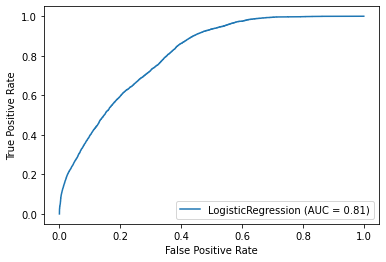

In [117]:
plot_roc_curve(logreg,X,y)
# Area Under ROC Curve (AUC) = 0.81 or 81%